# WOCE Climatology

In [1]:
import numpy as np
import xray
import matplotlib.pyplot as plt
from mpl_toolkits import basemap
from datetime import datetime

In [2]:
#pathname = 'http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/woce/wghc_params.nc'
pathname = '/Users/henrique/Dropbox/database/WOCE/Climatology/'
filename = 'wghc_params.nc'

ds = xray.open_dataset(pathname + filename)

In [3]:
ds

<xarray.Dataset>
Dimensions:   (LAT: 341, LON: 720, ZAX: 44)
Coordinates:
  * LON       (LON) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * LAT       (LAT) float64 -80.0 -79.5 -79.0 -78.5 -78.0 -77.5 -77.0 -76.5 ...
  * ZAX       (ZAX) float64 0.0 10.0 20.0 30.0 40.0 50.0 75.0 100.0 125.0 ...
Data variables:
    BOT_DEP   (ZAX, LAT, LON) float64 -2.682e+03 -2.682e+03 -2.774e+03 ...
    PRES      (ZAX, LAT, LON) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TEMP      (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    TPOTEN    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SALINITY  (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    OXYGEN    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SILICATE  (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    NITRATE   (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    PHOSPH    (ZAX, LAT, LON) float64 nan nan nan n

In [3]:
ds.data_vars

Data variables:
    BOT_DEP   (ZAX, LAT, LON) float64 -2.682e+03 -2.682e+03 -2.774e+03 ...
    PRES      (ZAX, LAT, LON) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TEMP      (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    TPOTEN    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SALINITY  (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    OXYGEN    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SILICATE  (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    NITRATE   (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    PHOSPH    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    GAMMAN    (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SIG0      (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SIG2      (ZAX, LAT, LON) float64 nan nan nan nan nan nan nan nan nan ...
    SIG4      (ZAX, LAT, LON) float64 nan nan nan n

In [4]:
ds.TEMP.data.shape

(44, 341, 720)

In [5]:
temp = ds.TEMP.data[0,:,:]
salt = ds.SALINITY.data[0,:,:]

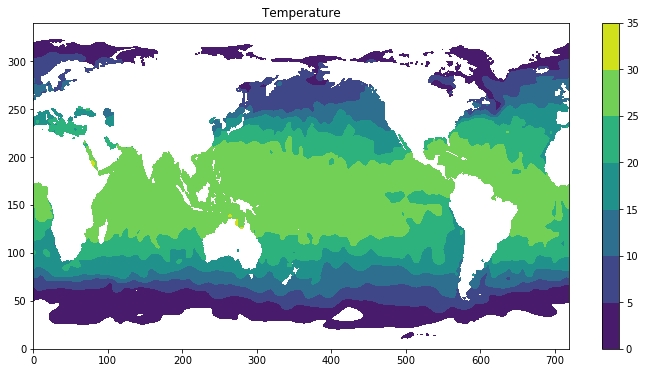

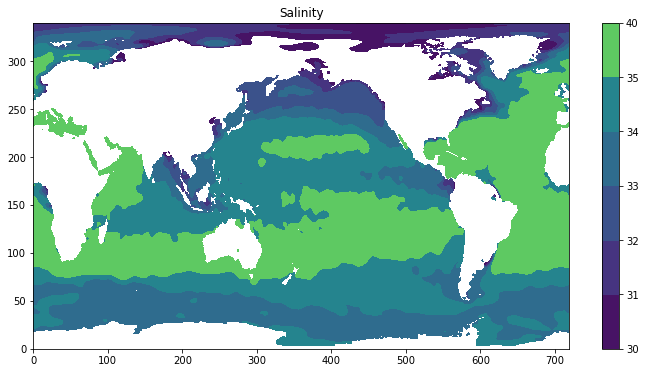

In [6]:
from matplotlib import cbook

plt.close('all')

plt.figure(figsize=(12,6))
plt.title('Temperature')
plt.contourf(temp, levels=[0,5,10,15,20,25,30,35])
plt.colorbar()
plt.show()

plt.figure(figsize=(12,6))
plt.title('Salinity')
plt.contourf(salt, levels=[30,31,32,33,34,35,40])
plt.colorbar()
plt.show()

# Fazer o regrid do WOCE para grade 1x1 grau

In [7]:
ds.data_vars.keys()

[u'BOT_DEP',
 u'PRES',
 u'TEMP',
 u'TPOTEN',
 u'SALINITY',
 u'OXYGEN',
 u'SILICATE',
 u'NITRATE',
 u'PHOSPH',
 u'GAMMAN',
 u'SIG0',
 u'SIG2',
 u'SIG4']

In [10]:
ds.TEMP

<xarray.DataArray 'TEMP' (ZAX: 44, LAT: 341, LON: 720)>
[10802880 values with dtype=float64]
Coordinates:
  * LON      (LON) float64 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 ...
  * LAT      (LAT) float64 -80.0 -79.5 -79.0 -78.5 -78.0 -77.5 -77.0 -76.5 ...
  * ZAX      (ZAX) float64 0.0 10.0 20.0 30.0 40.0 50.0 75.0 100.0 125.0 ...
Attributes:
    units: degrees C
    long_name: Temp

In [12]:
# variables descriptios

# metad = {
#         'TEMP': {'desc': 'Temperature',
#                  'unit': 'Celsius Deg',
#                  'varname': 'TEMP'},
    
#         'SALT':  {'desc': 'Salinity',
#                   'unit': 'PSU',
#                   'varname': 'SALINITY'},
    
#         'SALT':  {'desc': 'Salinity',
#                   'unit': 'PSU',
#                   'varname': 'SALINITY'},
    
#         'SALT':  {'desc': 'Salinity',
#                   'unit': 'PSU',
#                   'varname': 'SALINITY'},
    
#         'SALT':  {'desc': 'Salinity',
#                   'unit': 'PSU',
#                   'varname': 'SALINITY'},

#          }

In [102]:
metad['SALT']['varname']

'SALINITY'

In [28]:
# lat/lon of regular grid
lon = np.arange(-180, 181)
lat = np.arange(-90, 91)

#vv = ['TEMP', 'SALINITY']
#vv = metad.keys()

# regular grid
lons, lats = np.meshgrid(lon, lat)

d = {}
#for v in ds.data_vars.keys():
cont = -1

for v in ds.data_vars.keys():

    print v
    cont += 1

    #data with regular grid (depth, lat, lon)
    rgrid = np.zeros((len(ds.ZAX), len(lat), len(lon)))

    for j in range(rgrid.shape[0]):
        rgrid[j,:,:] = basemap.interp(datain=ds[v].data[j,:,:],
                                      xin=ds.LON.data-180,
                                      yin=ds.LAT.data,
                                      xout=lons,
                                      yout=lats)
        
    d[v] = (['level', 'latitude', 'longitude'], rgrid)
    
d['level'] = ('level', ds.ZAX.data)
d['latitude'] = ('latitude', np.arange(-90,91))
d['longitude'] = ('longitude', np.arange(0,361))

# create netcdf with all variables
dset_from_dict = xray.Dataset(d)
dset_from_dict.attrs['creation_date'] = datetime.utcnow().strftime("%Y-%m-%d")
dset_from_dict.attrs['dirname'] = '/stornext/online2/ocean/database_new/reanalysis/NOAA/CFSR/day/global/'
dset_from_dict.longitude.attrs['units'] = 'longitude'
dset_from_dict.latitude.attrs['units'] = 'latitude'

# cria descricao de cada variavel
for v in ds.data_vars.keys():
    
    dset_from_dict[v].attrs['units'] = ds[v].units
    dset_from_dict[v].attrs['description'] = ds[v].long_name

dset_from_dict.to_netcdf('WOCE_regrided.nc')

BOT_DEP
PRES
TEMP
TPOTEN
SALINITY
OXYGEN
SILICATE
NITRATE
PHOSPH
GAMMAN
SIG0
SIG2
SIG4


In [33]:
a = xray.open_dataset('WOCE_regrided.nc')
a.SILICATE.data.shape

(44, 181, 361)

In [25]:
ds.PRES

<xarray.DataArray 'PRES' (ZAX: 44, LAT: 341, LON: 720)>
array([[[    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        ..., 
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]],

       [[   10.,    10.,    10., ...,    10.,    10.,    10.],
        [   10.,    10.,    10., ...,    10.,    10.,    10.],
        [   10.,    10.,    10., ...,    10.,    10.,    10.],
        ..., 
        [   10.,    10.,    10., ...,    10.,    10.,    10.],
        [   10.,    10.,    10., ...,    10.,    10.,    10.],
        [   10.,    10.,    10., ...,    10.,    10.,    10.]],

       [[   20.,    20.,    20., ...,    20.,    20.,    20.],
        [   20.,    20.,    20., ...,    20.,    20.,    20.],
        [   20.,    20.,    20

In [19]:
ds.LON

<xarray.DataArray 'LON' (LON: 720)>
array([   0. ,    0.5,    1. ,    1.5,    2. ,    2.5,    3. ,    3.5,
          4. ,    4.5,    5. ,    5.5,    6. ,    6.5,    7. ,    7.5,
          8. ,    8.5,    9. ,    9.5,   10. ,   10.5,   11. ,   11.5,
         12. ,   12.5,   13. ,   13.5,   14. ,   14.5,   15. ,   15.5,
         16. ,   16.5,   17. ,   17.5,   18. ,   18.5,   19. ,   19.5,
         20. ,   20.5,   21. ,   21.5,   22. ,   22.5,   23. ,   23.5,
         24. ,   24.5,   25. ,   25.5,   26. ,   26.5,   27. ,   27.5,
         28. ,   28.5,   29. ,   29.5,   30. ,   30.5,   31. ,   31.5,
         32. ,   32.5,   33. ,   33.5,   34. ,   34.5,   35. ,   35.5,
         36. ,   36.5,   37. ,   37.5,   38. ,   38.5,   39. ,   39.5,
         40. ,   40.5,   41. ,   41.5,   42. ,   42.5,   43. ,   43.5,
         44. ,   44.5,   45. ,   45.5,   46. ,   46.5,   47. ,   47.5,
         48. ,   48.5,   49. ,   49.5,   50. ,   50.5,   51. ,   51.5,
         52. ,   52.5,   53. ,   53.5,   

In [112]:
a = xray.open_dataset('teste_woce5.nc')
a

<xarray.Dataset>
Dimensions:    (latitude: 181, level: 44, longitude: 361)
Coordinates:
  * latitude   (latitude) int64 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 ...
  * longitude  (longitude) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * level      (level) float64 0.0 10.0 20.0 30.0 40.0 50.0 75.0 100.0 125.0 ...
Data variables:
    SALT       (level, latitude, longitude) float64 nan nan nan nan nan nan ...
    TEMP       (level, latitude, longitude) float64 nan nan nan nan nan nan ...
Attributes:
    creation_date: 2017-08-08
    dirname: /stornext/online2/ocean/database_new/reanalysis/NOAA/CFSR/day/global/

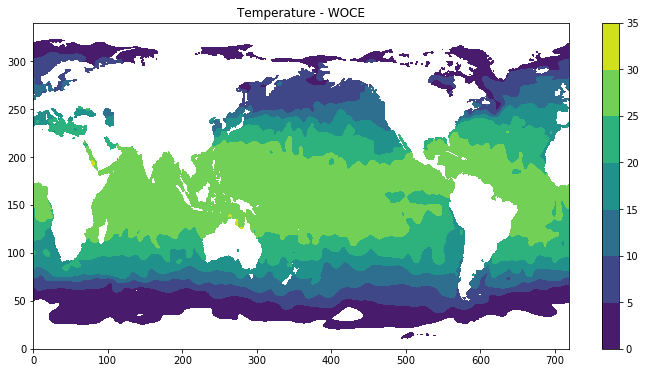

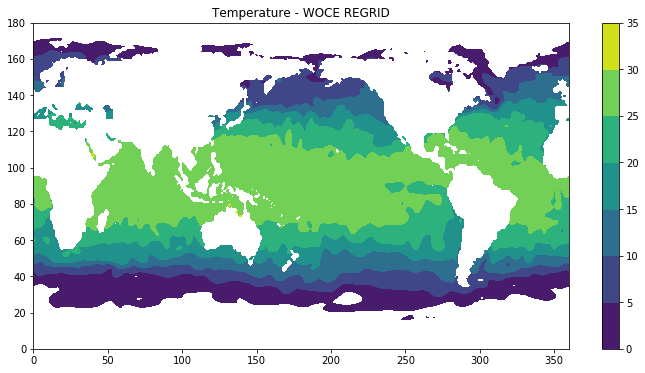

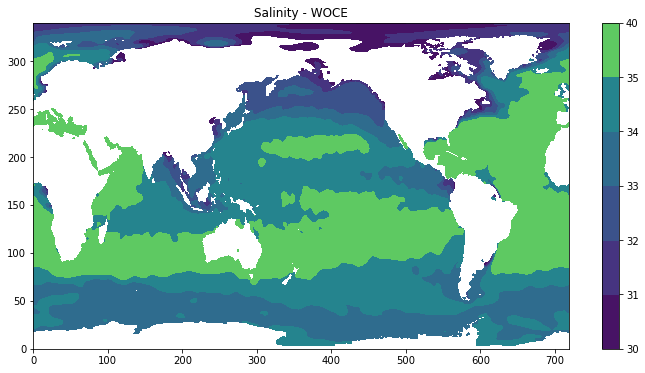

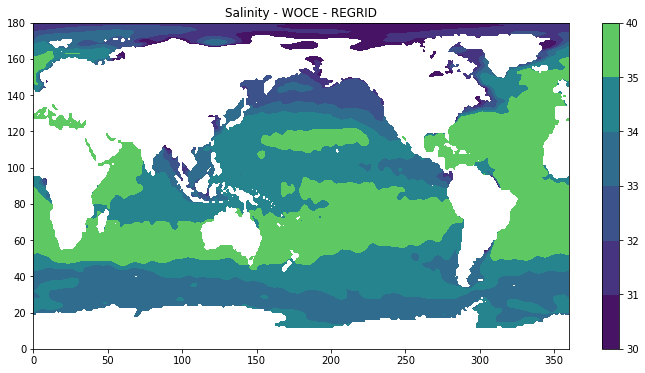

In [115]:
from matplotlib import cbook

plt.close('all')

plt.figure(figsize=(12,6))
plt.title('Temperature - WOCE')
plt.contourf(temp, levels=[0,5,10,15,20,25,30,35])
plt.colorbar()
plt.show()

plt.figure(figsize=(12,6))
plt.title('Temperature - WOCE REGRID')
plt.contourf(a.TEMP.data[0,:,:], levels=[0,5,10,15,20,25,30,35])
plt.colorbar()
plt.show()

plt.figure(figsize=(12,6))
plt.title('Salinity - WOCE')
plt.contourf(salt, levels=[30,31,32,33,34,35,40])
plt.colorbar()
plt.show()

plt.figure(figsize=(12,6))
plt.title('Salinity - WOCE - REGRID')
plt.contourf(a.SALT.data[0,:,:], levels=[30,31,32,33,34,35,40])
plt.colorbar()
plt.show()

In [117]:
a.level

<xarray.DataArray 'level' (level: 44)>
array([    0.,    10.,    20.,    30.,    40.,    50.,    75.,   100.,
         125.,   150.,   175.,   200.,   250.,   300.,   350.,   400.,
         500.,   600.,   700.,   800.,   900.,  1000.,  1100.,  1200.,
        1300.,  1400.,  1500.,  1750.,  2000.,  2250.,  2500.,  2750.,
        3000.,  3250.,  3500.,  3750.,  4000.,  4250.,  4500.,  4750.,
        5000.,  5250.,  5500.,  5750.])
Coordinates:
  * level    (level) float64 0.0 10.0 20.0 30.0 40.0 50.0 75.0 100.0 125.0 ...